# World Bank - Population Summarizing
Reduced '.csv' files from WB_data Notebook

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import requests
import matplotlib.pyplot as plt
from matplotlib import cbook
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import time


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# WB data set
WB_africadata_2000 = Path("Resources\WB_africadata_2000.csv")

In [3]:
# Read data file with the Pandas library
# encoding?, i.e encoding="ISO-8859-1"
WB_africadata_2000_df = pd.read_csv(WB_africadata_2000)

In [4]:
WB_africadata_2000_df

,series_id,country_code,country_name,year,value
0,SH.HIV.INCD.TL,KEN,Kenya,2017,3.400000e+04
1,SH.HIV.INCD.TL,LBR,Liberia,2017,1.600000e+03
2,SH.HIV.INCD.TL,LSO,Lesotho,2017,1.000000e+04
3,SH.HIV.INCD.TL,MDG,Madagascar,2017,7.200000e+03
4,SH.HIV.INCD.TL,MOZ,Mozambique,2017,1.300000e+05
...,...,...,...,...,...
652157,VA.NO.SRC,WSM,Samoa,2006,3.000000e+00
652158,FM.LBL.BMNY.GD.ZS,TCD,Chad,2010,1.146678e+01
652159,NE.CON.PRVT.CN.AD,SDN,Sudan,2000,2.199464e+10
652160,NE.CON.PRVT.CN.AD,SDN,Sudan,2003,3.190503e+10


### World Bank Data Source Break-down
###The 'WB_africadata_2000.csv' created in the WB_data notebook will be used to summarize the Foreign Aid and different indicators data.

###To help with the anlysis of the data, the data was put in bins of 5 years from 2000 to 2020, and a last bin for 2021 to 2023.

In [5]:
WB_africadata_2000_df2 = WB_africadata_2000_df

# Slicing of the Data
###In order to analyze the data and to understand the impact of the Foreign Aid with regards to poverty rate, literacy and mortality, the data was sliced by the "series_id". The deifinition of the diferent "series_id" values (indicators) is described in a second file downloaded from the Nasdaq API and saved as 'WB_metadata_df'.

###To facilitate/expedite the search and filtering of the relevant a function was created to search the text strings : "key_word". This function is case sensitive and it's used is combined with the review of the search output selection to identify the indicators that best match our work objective.

In [6]:
# WB id series definition data set
WB_metadata = Path("Resources/WB_METADATA_f7ce7fba293ccc6eb39cdf15fb097982.csv")

In [7]:
# Read data file with the Pandas library
WB_metadata_df = pd.read_csv(WB_metadata)

In [8]:
WB_metadata_df

,series_id,name,description
0,DC.DAC.DEUL.CD,"Net bilateral aid flows from DAC donors, Germa...",Net bilateral aid flows from DAC donors are th...
1,RQ.STD.ERR,Regulatory Quality: Standard Error,Regulatory Quality captures perceptions of the...
2,EG.USE.PCAP.KG.OE,Energy use (kg of oil equivalent per capita),Energy use refers to use of primary energy bef...
3,EN.POP.EL5M.UR.ZS,Urban population living in areas where elevati...,Urban population below 5m is the percentage of...
4,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...,Coverage of unemployment benefits and active l...
...,...,...,...
1479,SL.TLF.BASC.FE.ZS,"Labor force with basic education, female (% of...",The ratio of the labor force with basic educat...
1480,SL.GDP.PCAP.EM.KD,GDP per person employed (constant 2021 PPP $),GDP per person employed is gross domestic prod...
1481,SL.TLF.INTM.MA.ZS,"Labor force with intermediate education, male ...",The ratio of the labor force with intermediate...
1482,SL.UEM.NEET.FE.ZS,"Share of youth not in education, employment or...","Share of youth not in education, employment or..."


In [9]:
# This function will search within a text string for a given 'key word'. It is case sensitive

def key_word(df, search_col, word_txt, result_col):
    i=0   
    result_ls = []
    for item in df[search_col]:
        text_ls = [x.strip() for x in df[search_col][i].split()]
        if word_txt in text_ls:
            result_ls.append(df[result_col][i])
        i+=1
    if i >= df[search_col].count():
        if len(result_ls) > 0:
            return result_ls
        else:
            return print("Keyword Not found")

In [10]:
population_search = key_word(WB_metadata_df, 'name', 'population', 'series_id')

In [ ]:
#population_search

In [11]:
population_search2 = WB_metadata_df[WB_metadata_df['series_id'].isin(population_search)]

In [ ]:
#population_search2

# Selection of Indicators for Analysis

###Indicators are selected out of the search result and used to create reduc ed data sets. In the case of the Population indicator, we selected six types of indicators : Rural and Urban population quantity, Rural and Urban population percent of total population, and Rural and Urban population annual growth % per year.

###In order to organize the data, we prepared 6 data sets. One for each indicator.

In [ ]:
#SP.URB.TOTL:Urban population, SP.URB.TOTL.IN.ZS:Urban population (% of total population), SP.URB.GROW:Urban population growth (annual %)

#SP.RUR.TOTL:Rural population, SP.RUR.TOTL.ZS:Rural population (% of total population), SP.RUR.TOTL.ZG:Rural population growth (annual %),

#population_search_choiceURBT = ['SP.URB.TOTL']
#population_search_choiceRURT = ['SP.RUR.TOTL']
#population_search_choiceURBP = ['SP.URB.TOTL.IN.ZS']
#population_search_choiceRURP = ['SP.RUR.TOTL.ZS']
#population_search_choiceURBG = ['SP.URB.GROW']
#population_search_choiceRURG = ['SP.RUR.TOTL.ZG']

## Total Urban Population

In [12]:
WB_pop_URBT_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == 'SP.URB.TOTL']
#WB_pop_URBT_df

In [13]:
reduc_pop_URBT_df = WB_pop_URBT_df.reset_index()
reduc_pop_URBT_df.drop(columns=['index','series_id'], inplace=True)
reduc_pop_URBT_df

,country_code,country_name,year,value
0,AGO,Angola,2000,8211294.0
1,BFA,Burkina Faso,2000,2120383.0
2,BWA,Botswana,2000,919084.0
3,CAF,Central African Republic,2000,1414914.0
4,DJI,Djibouti,2000,567893.0
...,...,...,...,...
739,TZA,Tanzania,2023,25227921.0
740,UGA,Uganda,2023,13005977.0
741,WSM,Samoa,2023,39512.0
742,ZMB,Zambia,2023,9530988.0


In [14]:
URBT_table = reduc_pop_URBT_df.pivot(index='year', columns='country_name', values='value')
#URBT_table

## Total Rural Population

In [15]:
WB_pop_RURT_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == 'SP.RUR.TOTL']
#WB_pop_RURT_df

In [16]:
reduc_pop_RURT_df = WB_pop_RURT_df.reset_index()
reduc_pop_RURT_df.drop(columns=['index','series_id'], inplace=True)
#reduc_pop_RURT_df

In [17]:
RURT_table = reduc_pop_RURT_df.pivot(index='year', columns='country_name', values='value')
#RURT_table

# Total Population

In [18]:
TOT_table = RURT_table + URBT_table
TOT_table

country_name,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2000,16394062.0,1726985.0,11882888.0,3759170.0,8259137.0,742033.0,71371371.0,67031867.0,1272935.0,19665502.0,...,9704287.0,4584067.0,8721465.0,26298773.0,34463704.0,5008035.0,9893316.0,24020697.0,9891136.0,11834676.0
2001,16941587.0,1761930.0,12249764.0,3844773.0,8538804.0,765490.0,72854261.0,69018932.0,1306590.0,20195577.0,...,9938027.0,4857096.0,9070747.0,26947253.0,35414469.0,5145426.0,9995123.0,24763325.0,10191964.0,11910978.0
2002,17516139.0,1795130.0,12632269.0,3930648.0,8838369.0,789129.0,74393759.0,71073215.0,1341696.0,20758326.0,...,10180950.0,5140113.0,9411103.0,27570318.0,36353531.0,5281538.0,10094561.0,25545090.0,10508294.0,11984644.0
2003,18124342.0,1826863.0,13030591.0,4026841.0,9196366.0,806411.0,75963322.0,73168838.0,1378398.0,21329514.0,...,10434504.0,5350907.0,9758281.0,28188977.0,37333918.0,5421001.0,10193798.0,26354736.0,10837973.0,12075828.0
2004,18771125.0,1859085.0,13445977.0,4115138.0,9613503.0,818373.0,77522427.0,75301026.0,1417110.0,21906444.0,...,10698691.0,5533329.0,10117354.0,28831550.0,38360879.0,5565218.0,10292225.0,27146084.0,11188040.0,12160881.0
2005,19450959.0,1892807.0,13876127.0,4208834.0,10005012.0,830861.0,79075310.0,77469940.0,1458353.0,22496951.0,...,10974057.0,5683334.0,10467292.0,29540577.0,39439505.0,5711597.0,10388344.0,27946588.0,11564870.0,12224753.0
2006,20162340.0,1928704.0,14316242.0,4294352.0,10365614.0,846947.0,80629670.0,79691050.0,1502534.0,23098586.0,...,11263387.0,5809774.0,10784973.0,30332968.0,40562052.0,5874240.0,10483558.0,28773227.0,11971567.0,12330490.0
2007,20909684.0,1966977.0,14757074.0,4375569.0,10722731.0,865196.0,82218755.0,81996185.0,1549774.0,23708320.0,...,11563869.0,5939163.0,11118092.0,31191163.0,41716497.0,6047537.0,10580395.0,29629804.0,12402073.0,12450568.0
2008,21691522.0,2007320.0,15197915.0,4467233.0,11098664.0,882886.0,83844783.0,84357105.0,1599978.0,24326087.0,...,11872929.0,6090860.0,11444870.0,32065241.0,42870884.0,6222482.0,10680380.0,30509862.0,12852966.0,12550347.0


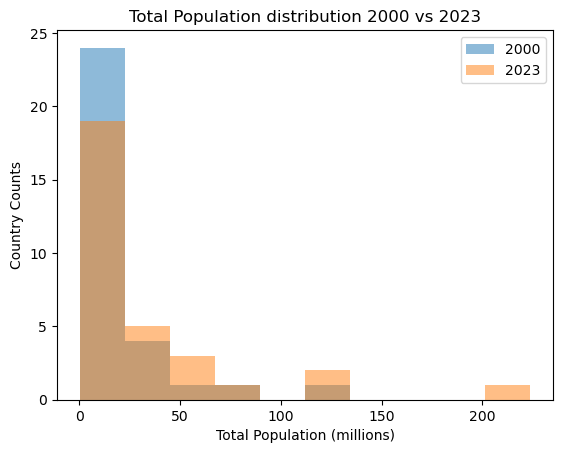

In [20]:
# Create a sample DataFrame
data = {
    '2000': (summary_table2['2000 Total Population (millions)']),
    '2023': (summary_table2['2023 Total Population (millions)'])
}
df = pd.DataFrame(data)

# Plot overlapping histograms
df.plot.hist(alpha=0.5, bins=10)
plt.title ("Total Population distribution 2000 vs 2023")
plt.xlabel('Total Population (millions)')
plt.ylabel('Country Counts')
plt.show()

# Add code to create figure output

In [23]:
data2 = {
    '2000 Total Population (millions)': (TOT_table.iloc[0, 0:31]/1_000_000),
    '2023 Total Population (millions)': (TOT_table.iloc[-1, 0:31]/1_000_000)   
}
summary_table2 = pd.DataFrame(data2)
summary_table2


,2000 Total Population (millions),2023 Total Population (millions)
country_name,,
Angola,16.394062,36.684202
Botswana,1.726985,2.675352
Burkina Faso,11.882888,23.251485
Central African Republic,3.759170,5.742315
Chad,8.259137,18.278568
Djibouti,0.742033,1.136455
"Egypt, Arab Rep.",71.371371,112.716598
Ethiopia,67.031867,126.527060
Gabon,1.272935,2.436566


In [24]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
summary_table2.to_csv("Resources\WB_africa-summary.csv", encoding="utf-8", index=False)

<Figure size 1000x600 with 0 Axes>

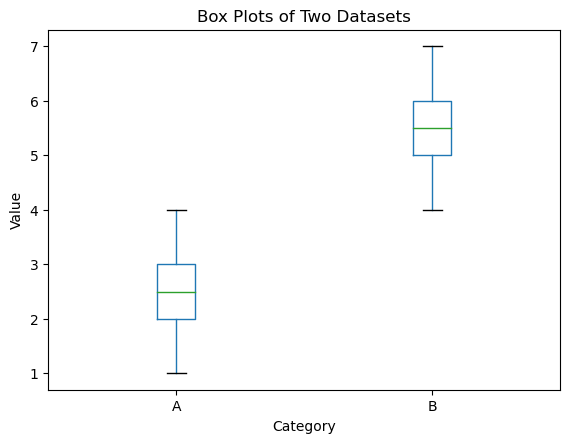

In [25]:
# Sample data
data1 = {'Category': ['A', 'A', 'A', 'B', 'B', 'B'], 'Value': [1, 2, 3, 4, 5, 6]}
data2 = {'Category': ['A', 'A', 'A', 'B', 'B', 'B'], 'Value': [2, 3, 4, 5, 6, 7]}

# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Combine DataFrames
df1['Dataset'] = 'Dataset 1'
df2['Dataset'] = 'Dataset 2'
combined_df = pd.concat([df1, df2])

# Plot box plots
plt.figure(figsize=(10, 6))
combined_df.boxplot(by='Category', column='Value', grid=False)
plt.title('Box Plots of Two Datasets')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

In [26]:
combined_df

,Category,Value,Dataset
0,A,1,Dataset 1
1,A,2,Dataset 1
2,A,3,Dataset 1
3,B,4,Dataset 1
4,B,5,Dataset 1
5,B,6,Dataset 1
0,A,2,Dataset 2
1,A,3,Dataset 2
2,A,4,Dataset 2
3,B,5,Dataset 2


In [ ]:
# My code - not working - DO NOT RUN!
# Sample data
data1 = {'Category': (WB_africadata_2000_df2['country_name'].unique()), 'Value': (summary_table2['2000 Total Population (millions)'])}
data2 = {'Category': (WB_africadata_2000_df2['country_name'].unique()), 'Value': (summary_table2['2023 Total Population (millions)'])}

# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Combine DataFrames
df1['Dataset'] = '2000'
df2['Dataset'] = '2023'
combined_df = pd.concat([df1, df2])

# Plot box plots
plt.figure(figsize=(10, 6))
combined_df.boxplot(by='Category', column='Value', grid=False)
plt.title('Box Plots of Two Datasets')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

In [ ]:
# My code - not working - DO NOT RUN!
data_2000 = {
    '2000': (summary_table2['2000 Total Population (millions)']),
    '2023': (summary_table2['2023 Total Population (millions)'])
}
df = pd.DataFrame(data2)

fig, (ax1) = plt.subplots()

# single boxplot call
summary_table2.boxplot(by='country_name', column)
ax1.boxplot(data2, patch_artist=True, boxprops={'facecolor': 'bisque'})
ax1.set_xticklabels=(['2000', '2023']),

plt.show()
